In [4]:
import graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
def main():
    # iris 데이터 로드 (1)
    dataset = datasets.load_iris()

    features = dataset.data
    targets = dataset.target

    #꽃잎의 길이와 넓이 정보만 특징으로 사용 (2)
    petal_features = features [:, 2:]

    #의사결정 모델 클래스 생성 (3)
    clris = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    #모델을 훈련 (4)
    clris.fit(petal_features, targets)

    #DoT ㅇ너어의 형식으로 결정 나무의 형태를 출력한다.
    with open('iris-dtree.dot', mode = 'w') as f:
        tree.export_graphviz(clris, out_file= f)


if __name__ == '__main__':
    main()

In [6]:
with open('./iris-dtree.dot') as f:
    dot_source = f.read()
graph = graphviz.Source(dot_source)

graph.render('iris-dtree', format='png')

'iris-dtree.png'

In [7]:
def main():
    dataset = datasets.load_iris()

    features = dataset.data
    targets = dataset.target

    clris = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    clris.fit(features, targets)

    with open('iris-dtree2.dot', mode='w') as f:
        tree.export_graphviz(clris, out_file=f, feature_names=dataset.feature_names, class_names=dataset.target_names)

if __name__ == '__main__':
    main()

In [7]:
with open('./iris-dtree2.dot') as f:
    dot_source = f.read()
graph = graphviz.Source(dot_source)
graph.render('iris-dtree2', format='png')

'iris-dtree2.png'

In [2]:
import graphviz
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
def main():
    cancer = datasets.load_breast_cancer()

    x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42, test_size=0.2)

    cancer_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

    cancer_model.fit(x_train, y_train)
    print('훈련 점수: {:.3f}'.format(cancer_model.score(x_train, y_train)))
    print('테스트 점수: {:.3f}'.format(cancer_model.score(x_test, y_test)))

    with open('cancer-dtree.dot', mode='w') as f:
        tree.export_graphviz(cancer_model, out_file=f, feature_names=cancer.feature_names, class_names=['cancer', 'not-cancer'])

if __name__ == '__main__':
    main()

훈련 점수: 0.967
테스트 점수: 0.947


In [5]:
with open('./cancer-dtree.dot') as f:
    dot_source = f.read()
graph = graphviz.Source(dot_source)
graph.render('cancer-dtree', format='png')

'cancer-dtree.png'

In [2]:
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

In [4]:
pi_diabetes = pd.read_csv('../source/3week/pima-indians-diabetes.csv', header=None)

x = pi_diabetes.iloc[:, :8]
y = pi_diabetes.iloc[:, 8].values.flatten()

print('x shape: {}, y shape: {}'.format(x.shape, y.shape))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

std_scl = StandardScaler()
std_scl.fit(x_train)
x_train = std_scl.transform(x_train)
x_test = std_scl.transform(x_test)

svc = SVC()
svc.fit(x_train, y_train)

print('훈련 점수: {:.3f}'.format(svc.score(x_train, y_train)))
print('테스트 점수: {:.3f}'.format(svc.score(x_test, y_test)))

x shape: (768, 8), y shape: (768,)
훈련 점수: 0.825
테스트 점수: 0.776


In [7]:
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [12]:
mushroom = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)

x = []
y = []

for row_index, row in mushroom.iterrows():
    y.append(row[0])
    row_x = []
    for v in row.iloc[1:]:
        row_x.append(ord(v))
    x.append(row_x)

x_train, x_test, y_train, y_test = train_test_split(x, y)

svc = SVC()
svc.fit(x_train, y_train)

print('훈련 점수: {:.3f}'.format(svc.score(x_train, y_train)))
print('테스트 점수: {:.3f}'.format(svc.score(x_test, y_test)))

훈련 점수: 0.995
테스트 점수: 0.996


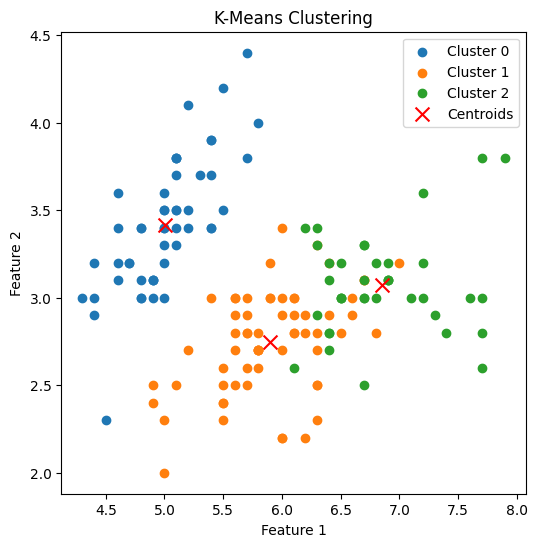

✅ 클러스터링 완료! 결과 저장됨:
 - 중심점 파일: ./centroids.csv
 - 클러스터 결과 파일: ./output.txt


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

def readData(filename, columns):
    data = np.genfromtxt(filename, delimiter=',', usecols=list(map(int, columns.split(','))), dtype='float')
    return data
k = 3
columns = '0,1,2,3'
data_filename = '../source/3week/iris.data'
centroid_filename = './centroids.csv'
result_filename = './output.txt'

data = readData(data_filename, columns)

centroids, _ = kmeans(data, k)

idx, _ = vq(data, centroids)

def writeResult(filename, idx):
    with open(filename, 'w', encoding='utf-8') as f:
        for i in idx:
            f.write(f'{i}\n')
writeResult(result_filename, idx)

np.savetxt(centroid_filename, centroids, delimiter=',')

plt.figure(figsize=(6,6))
for i in range(k):
    plt.scatter(data[idx == i, 0], data[idx == i, 1], label=f"Cluster {i}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

print(f"✅ 클러스터링 완료! 결과 저장됨:\n - 중심점 파일: {centroid_filename}\n - 클러스터 결과 파일: {result_filename}")

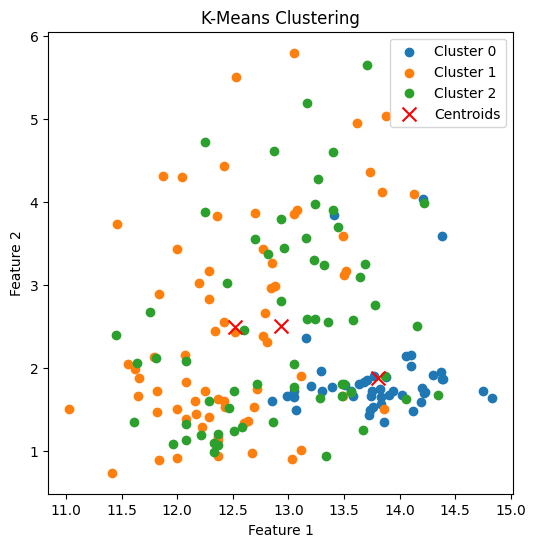

✅ 클러스터링 완료! 결과 저장됨:
 - 중심점 파일: ./wine-centroids.csv
 - 클러스터 결과 파일: ./wine-output.txt


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy.cluster.vq import kmeans, vq

k = 3
data_filename = '../source/3week/wine.data'
columns = '1,2,3,4,5,6,7,8,9,10,11,12,13'
centroid_filename = './wine-centroids.csv'
result_filename = './wine-output.txt'

def readData(filename, columns):
    data = genfromtxt(filename, delimiter=",", usecols=list(map(int, columns.split(","))), dtype=float)
    return data

data = readData(data_filename, columns)

centroids, _ = kmeans(data, k)

idx, _ = vq(data, centroids)

def writeResult(filename, idx):
    with open(filename, 'w', encoding='utf-8') as f:
        for i in idx:
            f.write(f'{i}\n')
writeResult(result_filename, idx)

np.savetxt(centroid_filename, centroids, delimiter=',')

plt.figure(figsize=(6,6))
for i in range(k):
    plt.scatter(data[idx == i, 0], data[idx == i, 1], label=f"Cluster {i}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

print(f'✅ 클러스터링 완료! 결과 저장됨:\n - 중심점 파일: {centroid_filename}\n - 클러스터 결과 파일: {result_filename}')

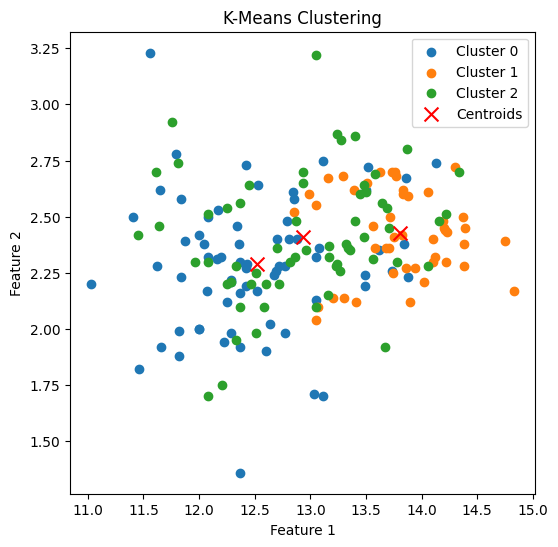

✅ 클러스터링 완료! 결과 저장됨:
 - 중심점 파일: ./wine-centroids-odd.csv
 - 클러스터 결과 파일: ./wine-output-odd.txt


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy.cluster.vq import kmeans, vq

k = 3
data_filename = '../source/3week/wine.data'
columns = '1,3,5,7,9,11,13'
centroid_filename = './wine-centroids-odd.csv'
result_filename = './wine-output-odd.txt'

def readData(filename, columns):
    data = genfromtxt(filename, delimiter=",", usecols=list(map(int, columns.split(","))), dtype=float)
    return data
data = readData(data_filename, columns)

centroids, _ = kmeans(data, k)

idx, _ = vq(data, centroids)

def writeResult(filename, idx):
    with open(filename, 'w', encoding='utf-8') as f:
        for i in idx:
            f.write(f'{i}\n')
writeResult(result_filename, idx)

np.savetxt(centroid_filename, centroids, delimiter=',')
plt.figure(figsize=(6,6))
for i in range(k):
    plt.scatter(data[idx == i, 0], data[idx == i, 1], label=f"Cluster {i}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

print(f'✅ 클러스터링 완료! 결과 저장됨:\n - 중심점 파일: {centroid_filename}\n - 클러스터 결과 파일: {result_filename}')

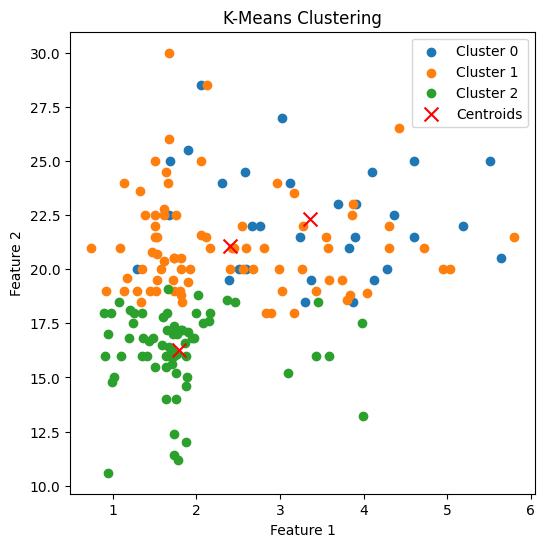

✅ 클러스터링 완료! 결과 저장됨:
 - 중심점 파일: ./wine-centroids-even.csv
 - 클러스터 결과 파일: ./wine-output-even.txt


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy.cluster.vq import kmeans, vq

k = 3
data_filename = '../source/3week/wine.data'
columns = '2,4,6,8,10,12'
centroid_filename = './wine-centroids-even.csv'
result_filename = './wine-output-even.txt'

def readData(filename, columns):
    data = genfromtxt(filename, delimiter=",", usecols=list(map(int, columns.split(","))), dtype=float)
    return data
data = readData(data_filename, columns)

centroids, _ = kmeans(data, k)

idx, _ = vq(data, centroids)

def writeResult(filename, idx):
    with open(filename, 'w', encoding='utf-8') as f:
        for i in idx:
            f.write(f'{i}\n')
writeResult(result_filename, idx)

np.savetxt(centroid_filename, centroids, delimiter=',')
plt.figure(figsize=(6,6))
for i in range(k):
    plt.scatter(data[idx == i, 0], data[idx == i, 1], label=f"Cluster {i}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

print(f'✅ 클러스터링 완료! 결과 저장됨:\n - 중심점 파일: {centroid_filename}\n - 클러스터 결과 파일: {result_filename}')